In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from utils import *
from plot_utils import *
%matplotlib inline

In [2]:
n_values = np.arange(5, 100, 1 ,dtype=int)

values_dict = {'star':dict(), 'wheel':dict(), 'agave step=1':dict(), 'agave step=n/3':dict(),
                'agave step=n':dict(), 'complete_bipartite a=b':dict(), 'complete_bipartite a=b/3':dict(), 'complete':dict()}
excluded_metrics = ['frac','m3','m4','W1', 'W2']

for n in tqdm(n_values):
    
    # Calculate values for Star
    G = nx.star_graph(n-1)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'star', values_dict,excluded_metrics)
    
    # Calculate values for wheel
    G = nx.wheel_graph(n)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'wheel', values_dict, excluded_metrics)
    
    # Calculate values for line_wheel
    G_prime = nx.wheel_graph(n)
    G = nx.line_graph(G_prime)
    P = stochastic_matrix_calculator(G)
    if G.number_of_nodes() < 200:
        append_values_plot_1(G, P, 'line_wheel', values_dict, excluded_metrics)
        
    
    # Calculate values for complete_bipartide a=b
    a = math.floor(n/2)
    b = math.ceil(n/2)
    G = nx.complete_bipartite_graph(n1=a,n2=b)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'complete_bipartite a=b', values_dict, excluded_metrics)
    
    # Calculate values for complete_bipartite a=1/3b
    a = math.floor(n/4)
    b = math.ceil(3*n/4)
    G = nx.complete_bipartite_graph(n1=a, n2=b)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'complete_bipartite a=b/3', values_dict, excluded_metrics)
    
    # calculate values for agave with small steps
    steps = 1
    G = create_agave_graph(n=n, steps=steps)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'agave step=1', values_dict, excluded_metrics)
    
    # calculate values for agave with medium steps
    steps = math.floor(n/3)
    G = create_agave_graph(n=n, steps=steps)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'agave step=n/3', values_dict, excluded_metrics)
    
    # calculate values for agave with large steps
    steps = n
    G = create_agave_graph(n=n, steps=steps)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'agave step=n', values_dict, excluded_metrics)
    
    # Calculate values for complete graph
    G = nx.complete_graph(n)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'complete', values_dict, excluded_metrics)

  0%|          | 0/95 [00:00<?, ?it/s]d:\Personal\University\Paper\Network - Dr.Safaei\new_h_parameter\utils.py:769: RuntimeWarning: divide by zero encountered in scalar divide
  W1 = (eig_lap[-1] - eig_lap[0]) / (eig_lap[-1] - eig_lap[1])
100%|██████████| 95/95 [01:45<00:00,  1.11s/it]


In [3]:
values_df = pd.DataFrame(values_dict).T.reset_index(drop=False)
values_df.rename(columns={'index':'Graph_name'})

,Graph_name,H,m2,Q,R,sum_R_v,Estrada,Estrada_P,Energy,n
0,star,"[0.17600000000000005, 0.21599999999999997, 0.2...","[0.39999999999999997, 0.3333333333333333, 0.28...","[5.0, 6.000000000000003, 7.000000000000004, 8....","[4.0, 5.0, 6.0, 7.0, 8.0, 9.000000000000002, 1...","[0.25, 0.2, 0.16666666666666666, 0.14285714285...","[10.524391382167263, 13.46334694226153, 16.668...","[1.0861612696304876, 1.0861612696304876, 1.086...","[3.9999999999999996, 4.47213595499958, 4.89897...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
1,wheel,"[0.007000000000000006, 0.02100000000000002, 0....","[0.31111111111111117, 0.29629629629629634, 0.2...","[1.6666666666666667, 2.518927630227216, 3.5000...","[1.3333333333333328, 1.727272727272727, 2.1500...","[0.10185185185185185, 0.13333333333333333, 0.1...","[27.85937931278961, 35.82614333907259, 44.8120...","[0.9482302580654266, 1.058607937858458, 1.1725...","[6.472135954999578, 9.371115440565934, 11.2915...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
2,agave step=1,"[0.05800000000000005, 0.09599999999999997, 0.1...","[0.3249999999999999, 0.27999999999999975, 0.24...","[2.5, 3.0000000000000004, 3.500000000000001, 4...","[1.7499999999999993, 2.2, 2.666666666666666, 3...","[0.125, 0.12000000000000002, 0.111111111111111...","[22.58875164759573, 32.606087455207316, 44.945...","[0.9694491642714644, 0.9863415456542477, 0.999...","[5.999999999999999, 6.744562646538027, 7.40312...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
3,agave step=n/3,"[0.05800000000000005, 0.03200000000000003, 0.0...","[0.3249999999999999, 0.24, 0.2142857142857141,...","[2.5, 2.0000000000000018, 2.333333333333333, 2...","[1.7499999999999993, 1.3999999999999995, 1.666...","[0.125, 0.06, 0.06666666666666667, 0.068027210...","[22.58875164759573, 67.06844370506346, 103.847...","[0.9694491642714644, 0.9045549707090355, 0.924...","[5.999999999999999, 8.324555320336758, 9.21110...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
4,agave step=n,"[0.0, 0.0010000000000000009, 0.001000000000000...","[0.25, 0.2000000000000001, 0.1666666666666667,...","[1.0, 1.0000000000000009, 1.0000000000000016, ...","[1.0, 1.0, 1.0000000000000007, 1.0, 0.99999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[56.06966779783001, 150.25255630843336, 405.63...","[0.8334849607446643, 0.8119355938489552, 0.797...","[8.0, 10.0, 12.000000000000002, 13.99999999999...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
5,complete_bipartite a=b,"[0.020000000000000018, 0.0, 0.0110000000000000...","[0.40000000000000024, 0.3333333333333332, 0.28...","[2.500000000000002, 2.0000000000000004, 2.3333...","[1.9166666666666665, 1.8, 1.9166666666666672, ...","[0.25, 0.19999999999999998, 0.1666666666666666...","[14.668772819667716, 24.135323991555545, 36.97...","[1.0861612696304885, 1.086161269630487, 1.0861...","[4.898979485566356, 6.0000000000000036, 6.9282...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
6,complete_bipartite a=b/3,"[0.17600000000000005, 0.21599999999999997, 0.2...","[0.39999999999999997, 0.3333333333333333, 0.28...","[5.0, 6.000000000000003, 7.000000000000004, 4....","[4.0, 5.0, 6.0, 3.19047619047619, 3.6607142857...","[0.25, 0.2, 0.16666666666666666, 0.14285714285...","[10.524391382167263, 13.46334694226153, 16.668...","[1.0861612696304876, 1.0861612696304876, 1.086...","[3.9999999999999996, 4.47213595499958, 4.89897...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
7,complete,"[0.0, 0.0010000000000000009, 0.001000000000000...","[0.25, 0.2000000000000001, 0.1666666666666667,...","[1.0, 1.0000000000000009, 1.0000000000000016, ...","[1.0, 1.0, 1.0000000000000007, 1.0, 0.99999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[56.06966779783001, 150.25255630843336, 405.63...","[0.8334849607446643, 0.8119355938489552, 0.797...","[8.0, 10.0, 12.000000000000002, 13.99999999999...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
8,line_wheel,"[0.007000000000000006, 0.02100000000000002, 0....","[0.222500

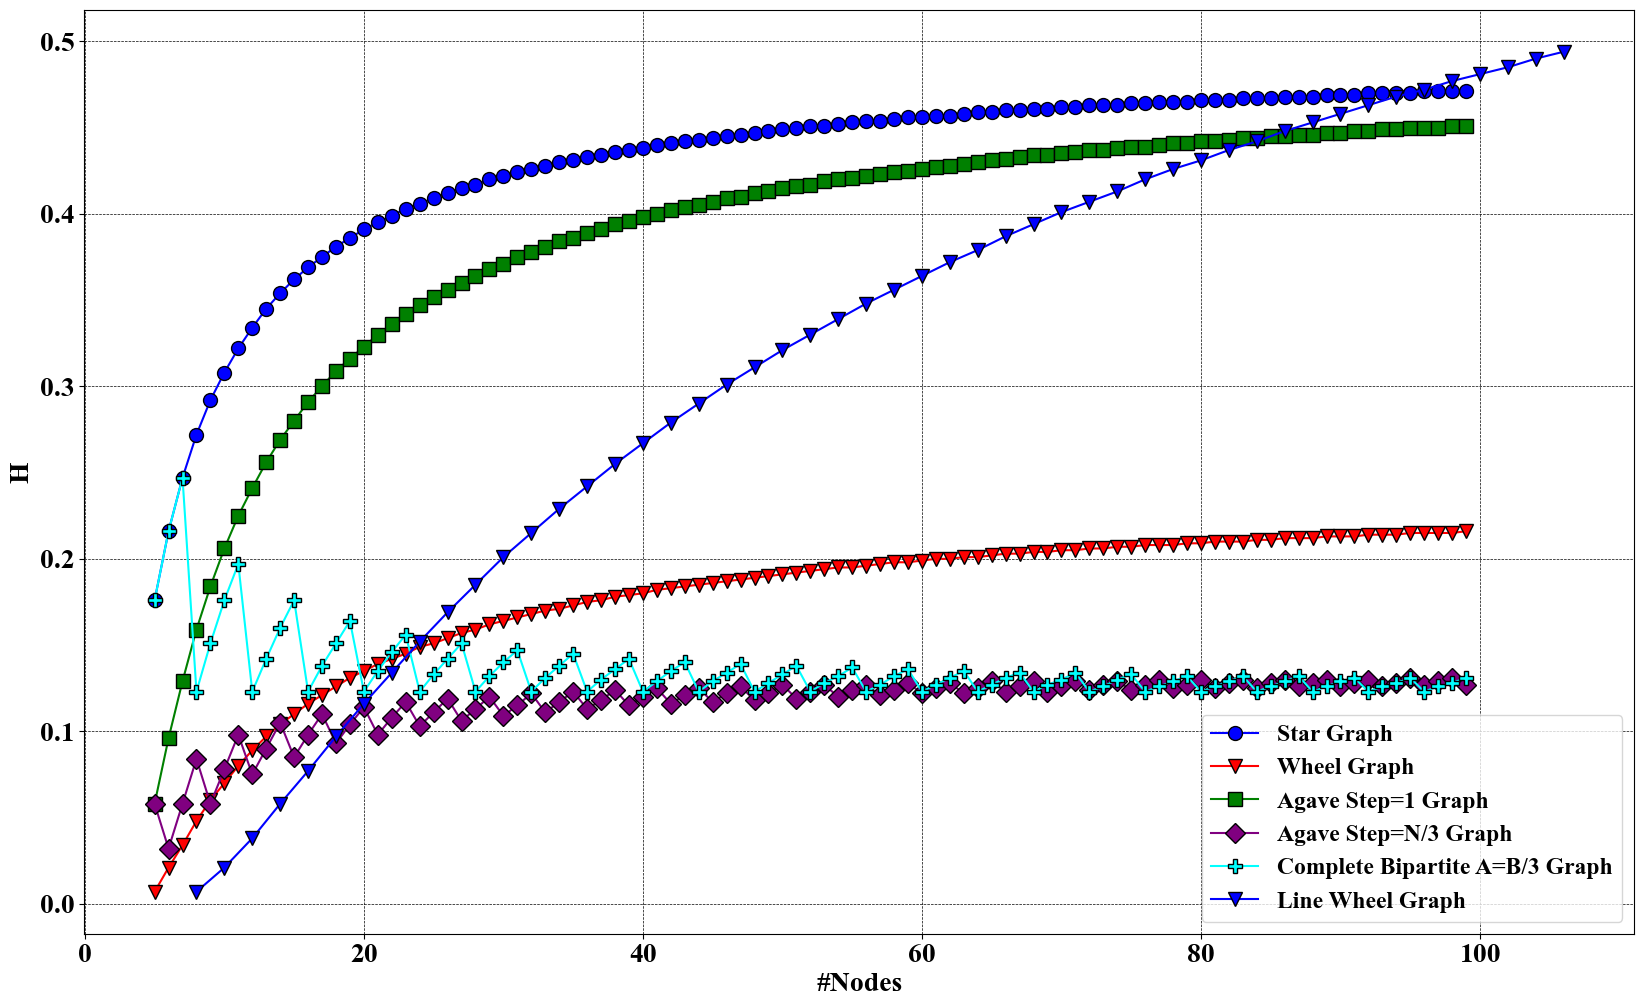

In [10]:
graph_keys = values_dict.keys()
exclude_keys = {'agave step=n', 'complete_bipartite a=b', 'complete', 'cycle'}


colors = ['b', 'r', 'g', 'purple', 'orange', 'pink', 'cyan', 'brown','b', 'violet','lime']
markers = ['o', 'v', 's', 'D', '^', '*', 'P', 'X', 'v', 's', '+']
edge_colors = ['black'] * len(graph_keys)
marker_size=10

plt.figure(figsize=(20, 12))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 17}

for i, key in enumerate(graph_keys):
    if key in exclude_keys:
        continue
        
    if key == 'line_wheel':
        n_values = values_dict[key]['n'][0:50]
        H_values = values_dict[key]['H'][0:50]
    else:
        n_values = values_dict[key]['n']
        H_values = values_dict[key]['H']
    
    plt.plot(n_values,
             H_values, 
             marker=markers[i], 
             c=colors[i], 
             markeredgecolor='black',
             markerfacecolor=colors[i],
             markersize=marker_size,
             label= key.replace('_', ' ').title()+" Graph")
    


plt.xlabel('#Nodes', family= 'times new roman', weight='bold', size=20)
plt.ylabel('H', family= 'times new roman', weight='bold', size=20)
plt.legend(loc='lower right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=20)
plt.yticks(family= 'times new roman', weight='bold', size=20)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/artificial_combined1.png" , dpi=1000, bbox_inches='tight')
plt.show()

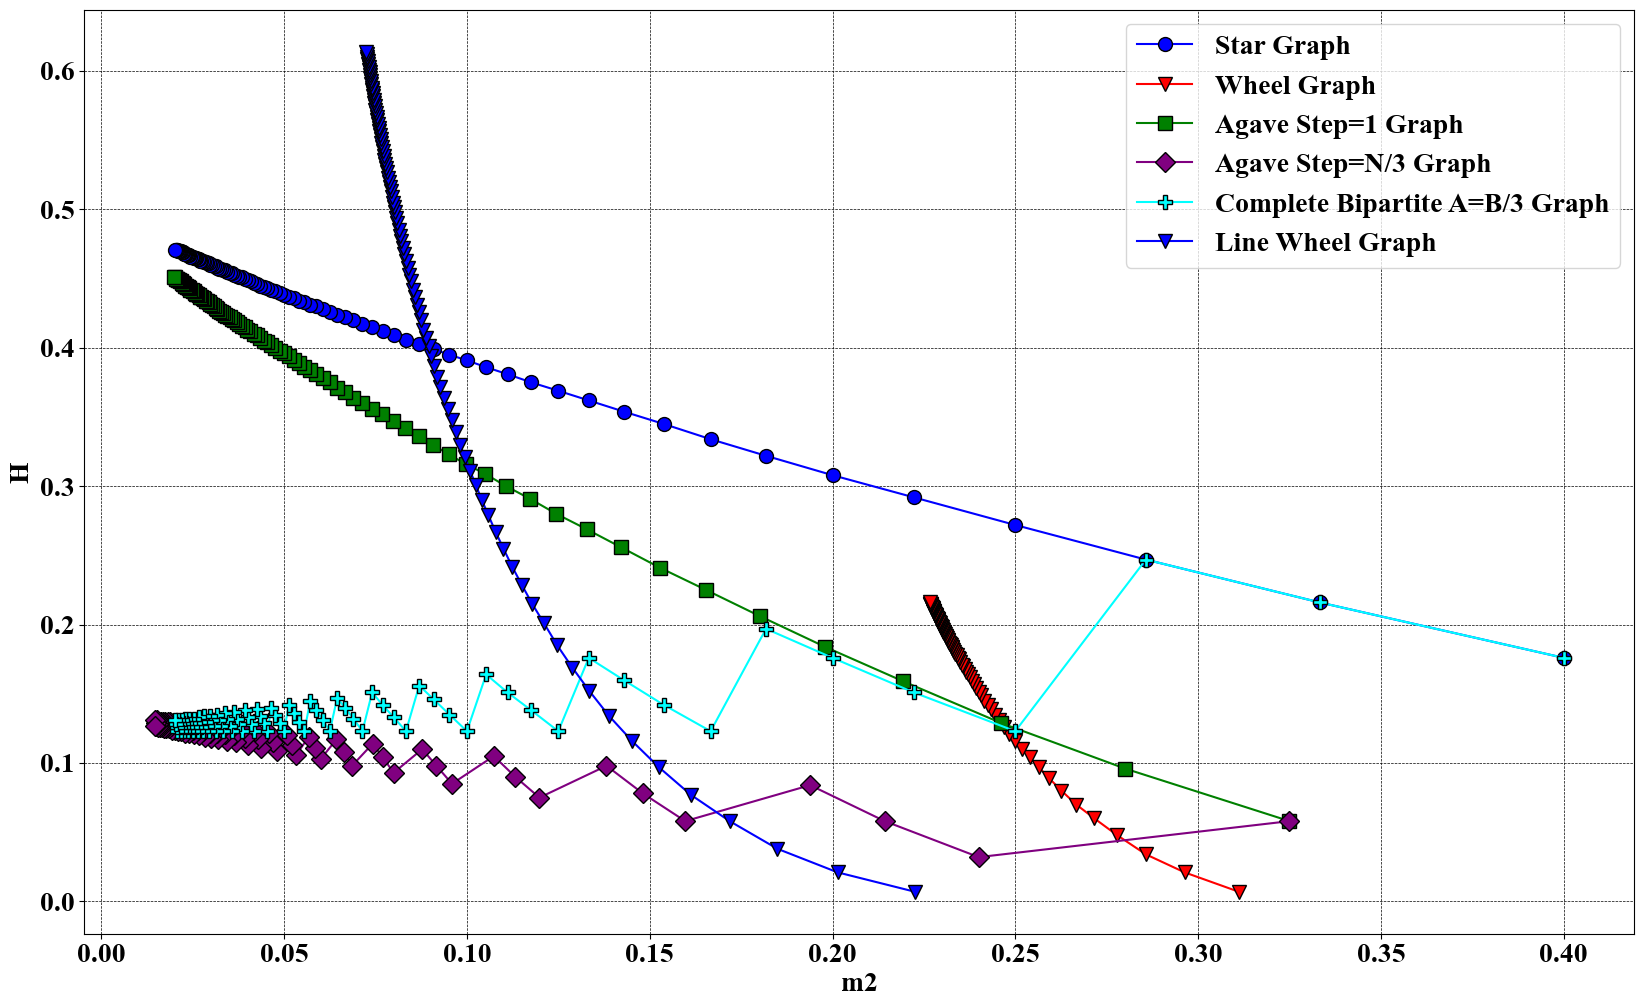

In [14]:
graph_keys = values_dict.keys()
exclude_keys = {'agave step=n', 'complete_bipartite a=b', 'complete', 'cycle'}


colors = ['b', 'r', 'g', 'purple', 'orange', 'pink', 'cyan', 'brown','b','lime']
markers = ['o', 'v', 's', 'D', '^', '*', 'P', 'X', 'v','o']
edge_colors = ['black'] * len(graph_keys)
marker_size=10

plt.figure(figsize=(20, 12))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 20}

for i, key in enumerate(graph_keys):
    if key in exclude_keys:
        continue
    
    m_values = values_dict[key]['m2']
    H_values = values_dict[key]['H']
    
    plt.plot(m_values, 
        H_values,       
        marker=markers[i], 
        c=colors[i], 
        markeredgecolor=edge_colors[i], 
        markerfacecolor=colors[i],
        markersize=marker_size,
        label=key.replace('_', ' ').title()+' Graph')

plt.xlabel('m2', family= 'times new roman', weight='bold', size=20)
plt.ylabel('H', family= 'times new roman', weight='bold', size=20)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=20)
plt.yticks(family= 'times new roman', weight='bold', size=20)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.savefig("plots/artificial_combined2.png" , dpi=1000, bbox_inches='tight')
plt.show()

In [19]:
graphs_to_save = [
    'star',
    'wheel', 
    'agave step=1',
    'agave step=n/3', 
    'complete_bipartite a=b/3',
    'line_wheel'
]

n_values = np.arange(5, 100, 1)

for graph_name in graphs_to_save:
    if graph_name in values_dict:
        inner_dict = values_dict[graph_name]
        if not inner_dict:
            print(f"Warning: Graph type '{graph_name}' has no data.")
            continue
            
        first_metric = next(iter(inner_dict.values()))
        if len(first_metric) != len(n_values):
            print(f"Warning: Data length mismatch for '{graph_name}'.")
            continue
            
        df = pd.DataFrame(inner_dict)
        df.insert(0, 'n_nodes', n_values) 
        
        safe_graph_name = graph_name.replace(' ', '_').replace('=', '_').replace('/', '_')
        filename = f"SavedNetworks/artificial_{safe_graph_name}.csv"
        df.to_csv(filename, index=False)
        print(f"Saved {filename} with {len(df)} rows and {len(df.columns)-1} metrics.")
    else:
        print(f"Warning: Graph type '{graph_name}' was not found in values_dict and will be skipped.")

Saved SavedNetworks/artificial_star.csv with 95 rows and 9 metrics.
Saved SavedNetworks/artificial_wheel.csv with 95 rows and 9 metrics.
Saved SavedNetworks/artificial_agave_step_1.csv with 95 rows and 9 metrics.
Saved SavedNetworks/artificial_agave_step_n_3.csv with 95 rows and 9 metrics.
Saved SavedNetworks/artificial_complete_bipartite_a_b_3.csv with 95 rows and 9 metrics.
Saved SavedNetworks/artificial_line_wheel.csv with 95 rows and 9 metrics.
